In [2]:
#importing libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Getting the Data
train_df = pd.read_csv("titanic_train.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
We can see a lot of features that need conversion into numeric such as Name,Sex, Ticket, Cabin and Embarked.

Then, we also need to scale the data as we have features with different ranges.

We also need to manage missing vales and also NAN values. Then, start with missing/ NAN values.

In [5]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

The 2 missing value of Embarked column, we will fill it with mode. 

Regarding the missing value of 177 of column age, we will fill it with average/mean of the column.

Regarding the Cabin, we can fill it with the mode value.


In [6]:
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])


In [7]:
train_df.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
dtype: int64

In [9]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())


In [10]:
train_df.isnull().sum().sort_values(ascending=False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
dtype: int64

In [11]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
#Data Exploration/Analysis
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#The training-set has 891 examples non null values and 11 features plus the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. 

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#just checking the issing values so that we are assure that we have no more missing values:

In [14]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0


In [15]:
train_df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

If we check the columns, we can realize that all columns except PassengerId, Ticket and Name would be correlated with the target survival column.

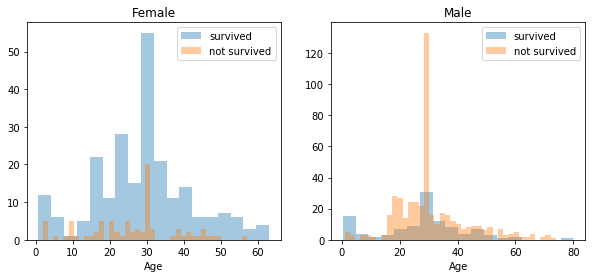

In [16]:
#1.Let's check Survival column by type of Sex.

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

We can see the high probability of survival for women is between age 14 and 40. And regarding the men, similar happens but it has more survival rate between 18 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. 

Regaring the infants we have higher probability of survival.



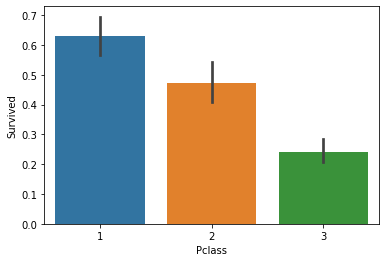

In [18]:
#4. Pclass:
sns.barplot(x='Pclass', y='Survived', data=train_df)


As we can see, Pclass differente to the person survival. As we see, the Pclass 1 has more chance to survive than others.


Finally we will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. 

In [22]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [23]:
#Converting Features:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      891 non-null    object 
 10  Embarked   891 non-null    object 
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Above you can see that ‘Fare’ is a float. So, we can fill it with 0. 

And regarding 4 categorical features: Name, Sex, Ticket and Embarked. We can encode these.


In [24]:
data = [train_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [25]:
data = [train_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)


Sex:
Convert ‘Sex’ feature into numeric.

In [26]:
genders = {"male": 0, "female": 1}
data = [train_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [27]:
#Ticket:
train_df['Ticket'].describe()


count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [28]:
train_df = train_df.drop(['Ticket'], axis=1)


Embarked:
Convert ‘Embarked’ feature into numeric.

In [29]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Creating Categories:
We will now create categories within the following features:
Age:
Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

In [33]:
data = [train_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 33), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 64), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 5

# let's see how it's distributed train_df['Age'].value_counts()

Fare:
For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [34]:
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title
0,0,3,0,2,1,0,7,B96 B98,0,1,0,1
1,1,1,1,3,1,0,71,C85,1,1,0,3
2,1,3,1,2,0,0,7,B96 B98,0,0,1,2
3,1,1,1,3,1,0,53,C123,0,1,0,3
4,0,3,0,3,0,0,8,B96 B98,0,0,1,1
5,0,3,0,2,0,0,8,B96 B98,2,0,1,1
6,0,1,0,4,0,0,51,E46,0,0,1,1
7,0,3,0,0,3,1,21,B96 B98,0,4,0,4
8,1,3,1,2,0,2,11,B96 B98,0,2,0,3
9,1,2,1,1,1,0,30,B96 B98,1,1,0,3


In [35]:
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Creating new Features
I will add two new features to the dataset, that I compute out of other features.

In [36]:
#1. Age times Class
data = [train_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [41]:
#2. Fare per Person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_df = train_df.drop("Cabin", axis=1)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,1,6,0
1,1,1,1,3,1,0,3,1,1,0,3,3,1
2,1,3,1,2,0,0,0,0,0,1,2,6,0
3,1,1,1,3,1,0,3,0,1,0,3,3,1
4,0,3,0,3,0,0,1,0,0,1,1,9,1
5,0,3,0,2,0,0,1,2,0,1,1,6,1
6,0,1,0,4,0,0,3,0,0,1,1,4,3
7,0,3,0,0,3,1,2,0,4,0,4,0,0
8,1,3,1,2,0,2,1,0,2,0,3,6,0
9,1,2,1,1,1,0,2,1,1,0,3,2,1


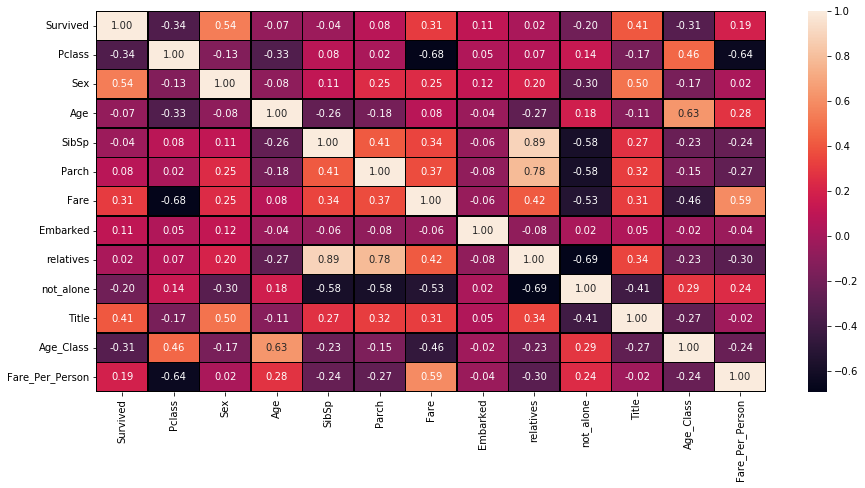

In [45]:
#Correlation using heatmap:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(train_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

CORRELATION COMMENTS: almost all data is positively correlated with target.

In [46]:
#We already checked we have skewness in our data. And we will check outliers in our data remove them if we can.

#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train_df))
z.shape

(891, 13)

In [47]:

threhold=3
print(np.where(z>3))

(array([ 13,  13,  16,  25,  25,  30,  50,  59,  59,  68,  68,  71,  71,
        86, 116, 119, 119, 149, 150, 159, 159, 164, 167, 171, 180, 180,
       182, 182, 195, 201, 201, 233, 233, 245, 249, 258, 261, 261, 266,
       269, 278, 280, 306, 317, 324, 324, 325, 337, 360, 373, 380, 386,
       386, 398, 437, 438, 449, 480, 480, 527, 536, 537, 541, 541, 542,
       542, 556, 557, 567, 599, 609, 610, 610, 626, 632, 638, 647, 660,
       678, 678, 683, 683, 686, 694, 708, 716, 730, 736, 737, 745, 759,
       766, 774, 787, 792, 792, 796, 813, 813, 822, 824, 846, 846, 848,
       850, 850, 851, 858, 863, 863, 885, 886]), array([ 5,  8,  4,  5,  8, 10,  4,  4,  8,  4,  8,  4,  8,  5, 11,  4,  8,
       10, 10,  4,  8,  4,  5,  4,  4,  8,  4,  8, 12,  4,  8,  4,  8, 10,
       10, 12,  4,  8,  4, 12,  4, 11, 12, 10,  4,  8, 12, 12,  5, 12, 12,
        4,  8, 10,  5,  5, 10,  4,  8, 12, 10, 12,  4,  8,  4,  8, 10, 12,
        5, 10, 12,  5,  8, 10, 10,  5, 10, 10,  5,  8,  4,  8,  4, 10, 12,

In [49]:

df_new=train_df[(z<3).all(axis=1)]
print(train_df.shape)
print(df_new.shape)

(891, 13)
(804, 13)


In [51]:
#Percentage of data loss:
loss_perc=(891-804)/891*100
loss_perc #since the loss < 10%, so we can proceed with removing the outliers.

9.764309764309765

In [52]:
#Now let's split the data by features (X, all except Survived Column) and target outcome (Y, Survived)

X=df_new.drop(['Survived'],axis=1)
Y=df_new['Survived']

In [53]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

In [54]:
#now we will standardrize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.8589336 , -0.72699182, -0.19175826, ..., -0.77131131,
         0.46435801, -1.05623747],
       [-1.48452526,  1.37553129,  0.77382242, ...,  1.49218545,
        -0.70643852,  0.60566113],
       [ 0.8589336 ,  1.37553129, -0.19175826, ...,  1.05014505,
         0.46435801, -1.05623747],
       ...,
       [ 0.8589336 ,  1.37553129, -0.19175826, ...,  1.05014505,
         0.46435801, -1.05623747],
       [-1.48452526, -0.72699182, -0.19175826, ..., -0.77131131,
        -1.13744515,  1.33924305],
       [ 0.8589336 , -0.72699182, -0.19175826, ..., -0.77131131,
         0.46435801, -1.05623747]])

In [55]:
#split data in training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

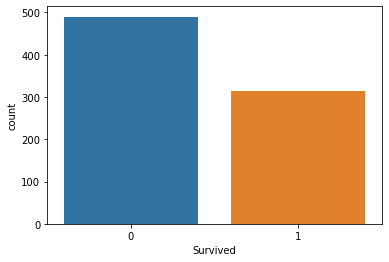

In [56]:
#visualization of type of sex
'''Sex Count of Survived and No survived person'''
sns.countplot(x='Survived', data = df_new)

In [ ]:
#We can see the data is fine to study as it is not that much unbalanced. So we can continue.

#Building Machine Learning Models
Now we will train several Machine Learning models and compare their results. 

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=2)
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.4336205511359289


In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is: - {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: - {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is: - 0.444974223043749
At random state 0, the testing accuracy is: - 0.42582736144225064


At random state 1, the training accuracy is: - 0.4083320645286479
At random state 1, the testing accuracy is: - 0.5066734552119929


At random state 2, the training accuracy is: - 0.43827438931128415
At random state 2, the testing accuracy is: - 0.4336205511359289


At random state 3, the training accuracy is: - 0.46164575094570415
At random state 3, the testing accuracy is: - 0.3820365500515105


At random state 4, the training accuracy is: - 0.4237674750023138
At random state 4, the testing accuracy is: - 0.4793846363125017


At random state 5, the training accuracy is: - 0.4511224506083906
At random state 5, the testing accuracy is: - 0.39242346185857957


At random state 6, the training accuracy is: - 0.4533505061815526
At random state 6, the testing accuracy is: - 0.3996408738399515


At random state 7, the training accuracy is: - 0.44621300713400847

In [62]:
#Cross validation of the model:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is 0.40274232982114844 and accuracy score for training is 0.44177414331652 and accuracy for the testing is 0.4288726641744952


At cross fold 3 the CV score is 0.4132279662028189 and accuracy score for training is 0.44177414331652 and accuracy for the testing is 0.4288726641744952


At cross fold 4 the CV score is 0.41866955442026943 and accuracy score for training is 0.44177414331652 and accuracy for the testing is 0.4288726641744952


At cross fold 5 the CV score is 0.41322794980508776 and accuracy score for training is 0.44177414331652 and accuracy for the testing is 0.4288726641744952


At cross fold 6 the CV score is 0.41277722301058145 and accuracy score for training is 0.44177414331652 and accuracy for the testing is 0.4288726641744952


At cross fold 7 the CV score is 0.4125649723101396 and accuracy score for training is 0.44177414331652 and accuracy for the testing is 0.4288726641744952


At cross fold 8 the CV score is 0.41941089031846346 and accu

In [64]:
#Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [65]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [66]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.4380905543758342

In [67]:
#best cross fold is 4
cv_score=cross_val_score(ls,x,Y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.4242448961244101

In [68]:
#Ensemble Technique:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [69]:

rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: 34.76051192252113
Cross Val Score: 39.006533307667574
0.3476051192252113


#Let's go for more machine learning models and compare them.

In [70]:
#Stochastic Gradient Descent (SGD):
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [71]:
#Random Forest:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [72]:
#Logistic Regression:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


In [77]:
#K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train,Y_train) * 100, 2)

In [78]:
#Gaussian Naive Bayes:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [79]:
#Perceptron:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [80]:
#Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [81]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [82]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.10,Random Forest
91.10,Decision Tree
84.52,KNN
82.74,Support Vector Machines
82.74,Logistic Regression
78.83,Stochastic Gradient Decent
77.76,Naive Bayes
69.22,Perceptron


As we can see, the Random Forest classifier goes on the first place and then Decision Tree. 

In [83]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.70175439 0.73684211 0.85964912 0.83928571 0.875      0.85714286
 0.85714286 0.85714286 0.85714286 0.8       ]
Mean: 0.824110275689223
Standard Deviation: 0.056227818822180364


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 5 %. The standard deviation shows us, how precise the estimates are .
I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

Feature Importance
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [86]:
#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

91.1 %


In [88]:
print("score:", round(random_forest.oob_score_, 4)*100, "%")


score: 81.67 %


In [ ]:
#Now we can start tuning the hyperameters of random forest.

Hyperparameter Tuning


In [89]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

KeyboardInterrupt: 

In [ ]:
#Test new Parameters:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.05 %

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. 

For further Evaluation, let's print confusion matrix:

In [90]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[297,  46],
       [ 61, 158]])

In [91]:
#Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7745098039215687
Recall: 0.7214611872146118


Our model predicts 7% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 72 % of the people who actually survived.

F-Score
You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.



In [92]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7470449172576833

We have a 74% of F-score. The score is not that high, because we have a recall of 73%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. 

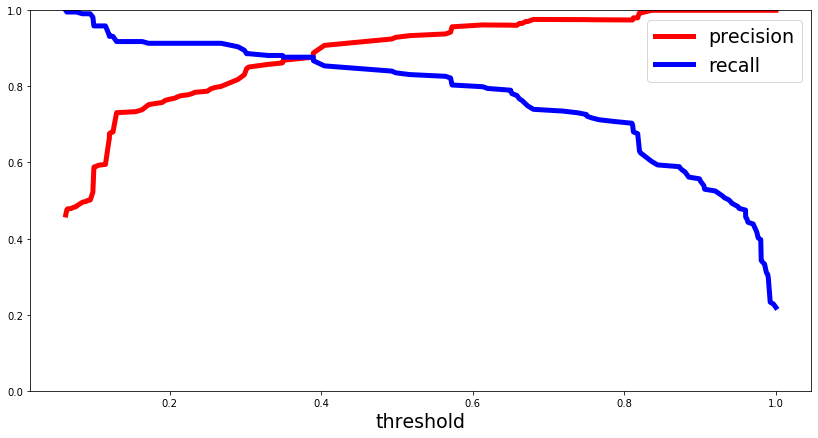

In [93]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. 

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem.


ROC AUC Curve
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

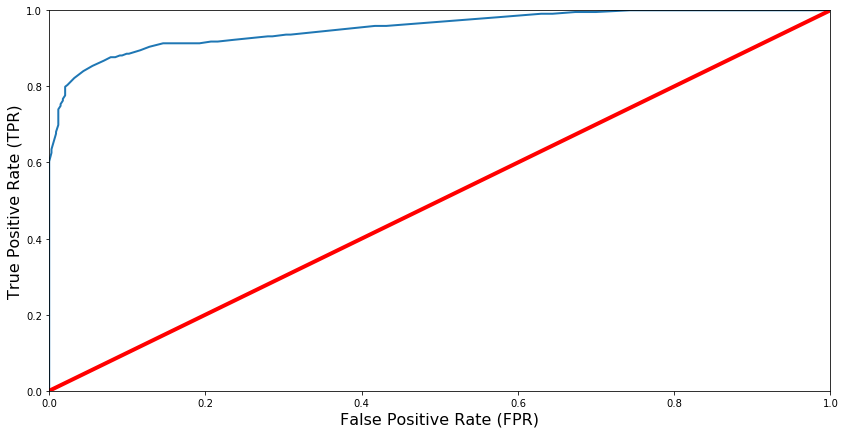

In [95]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.
Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.
ROC AUC Score
The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [96]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9530066429702997


We have good ROC-AUC Score.